In [10]:
pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177.0 MB 31 kB/s 
  Created wheel for h2o: filename=h2o-3.36.1.2-py2.py3-none-any.whl size=177070945 sha256=440e05334859f1b887534340551b73c847fc3f437b7759e642013f6200ecdaec
  Stored in directory: /root/.cache/pip/wheels/a5/2b/ae/534595df09001e1573b1046be62a3f049507307340119db65c
Successfully built h2o


In [11]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [12]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
openjdk version "11.0.15" 2022-04-19
OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1)
OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)


In [13]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
 import h2o

In [15]:

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.15" 2022-04-19; OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1); OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmponsss4kk
  JVM stdout: /tmp/tmponsss4kk/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmponsss4kk/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.2
H2O_cluster_version_age:,"7 days, 15 hours and 38 minutes"
H2O_cluster_name:,H2O_from_python_unknownUser_d2ux6d
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [16]:
from h2o.automl import H2OAutoML

In [17]:
df = h2o.import_file('/content/drive/MyDrive/IIIT-K Intern/country_wise_latest.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [18]:
df.types

{'1 week % increase': 'real',
 '1 week change': 'int',
 'Active': 'int',
 'Confirmed': 'int',
 'Confirmed last week': 'int',
 'Country/Region': 'string',
 'Deaths': 'int',
 'Deaths / 100 Cases': 'real',
 'Deaths / 100 Recovered': 'real',
 'New cases': 'int',
 'New deaths': 'int',
 'New recovered': 'int',
 'Recovered': 'int',
 'Recovered / 100 Cases': 'real',
 'WHO Region': 'enum'}

In [19]:
df.describe()

Rows:187
Cols:15




,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
type,string,int,int,int,int,int,int,int,real,real,real,int,int,real,enum
mins,NaN,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,-47.0,-3.84,
mean,NaN,88130.93582887705,3497.518716577539,50631.48128342246,34001.93582887701,1222.9572192513367,28.95721925133689,933.8128342245989,3.01951871657754,64.82053475935831,40.55829670329671,78682.47593582892,9448.459893048126,13.606203208556154,
maxs,NaN,4290259.0,148011.0,1846641.0,2816444.0,56336.0,1076.0,33728.0,28.56,100.0,3259.26,3834677.0,455582.0,226.32,
sigma,NaN,383318.6638306154,14100.00248201848,190188.18964313966,213326.17337142891,5710.374790280563,120.03717295550823,4197.719634688254,3.454302488361351,26.287694261858874,336.6693570994989,338273.67656653706,47491.12768403525,24.509837744455993,
zeros,0,0,17,6,5,33,91,61,17,6,17,0,12,12,
missing,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0
0,Afghanistan,36263.0,1269.0,25198.0,9796.0,106.0,10.0,18.0,3.5,69.49,5.04,35526.0,737.0,2.07,Eastern Mediterranean
1,Albania,4880.0,144.0,2745.0,1991.0,117.0,6.0,63.0,2.95,56.25,5.25,4171.0,709.0,17.0,Europe
2,Algeria,27973.0,1163.0,18837.0,7973.0,616.0,8.0,749.0,4.16,67.34,6.17,23691.0,4282.0,18.07,Africa


In [20]:
df_train,df_test,df_valid = df.split_frame(ratios=[.7, .15])

In [21]:
df_train

Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.6,Europe
Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
Antigua and Barbuda,86,3,65,18,4,0,5,3.49,75.58,4.62,76,10,13.16,Americas
Austria,20558,713,18246,1599,86,1,37,3.47,88.75,3.91,19743,815,4.13,Europe
Azerbaijan,30446,423,23242,6781,396,6,558,1.39,76.34,1.82,27890,2556,9.16,Europe
Bahamas,382,11,91,280,40,0,0,2.88,23.82,12.09,174,208,119.54,Americas
Bangladesh,226225,2965,125683,97577,2772,37,1801,1.31,55.56,2.36,207453,18772,9.05,South-East Asia
Barbados,110,7,94,9,0,0,0,6.36,85.45,7.45,106,4,3.77,Americas
Belarus,67251,538,60492,6221,119,4,67,0.8,89.95,0.89,66213,1038,1.57,Europe


In [40]:
y = "WHO Region"
x = df.columns
x.remove(y)
x.remove("Country/Region")

In [41]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)

In [42]:
aml.train(x = x, y = y, training_frame = df_train, validation_frame=df_valid)

AutoML progress: |
06:45:38.605: Project: AutoML_2_20220603_64538
06:45:38.605: Cross-validation disabled by user: no fold column nor nfolds > 1.
06:45:38.609: Setting stopping tolerance adaptively based on the training frame: 0.05
06:45:38.609: Build control seed: 10
06:45:38.610: training frame: Frame key: AutoML_2_20220603_64538_training_py_2_sid_9a32    cols: 15    rows: 135  chunks: 1    size: 9556  checksum: -6096892916768307408
06:45:38.610: validation frame: Frame key: py_4_sid_9a32    cols: 15    rows: 28  chunks: 1    size: 3498  checksum: -9067743764230477440
06:45:38.610: leaderboard frame: Frame key: py_4_sid_9a32    cols: 15    rows: 28  chunks: 1    size: 3498  checksum: -9067743764230477440
06:45:38.610: blending frame: NULL
06:45:38.610: response column: WHO Region
06:45:38.610: fold column: null
06:45:38.610: weights column: null
06:45:38.611: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)

,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,30.0,180.0,77582.0,4.0,6.0,5.988889,7.0,48.0,29.655556




ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.0031200937604283726
RMSE: 0.055857799459237314
LogLoss: 0.05099143488062334
Mean Per-Class Error: 0.0
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,Africa,Americas,Eastern Mediterranean,Europe,South-East Asia,Western Pacific,Error,Rate
0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0 / 40
1,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0 / 23
2,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0 / 15
3,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0 / 40
4,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0 / 8
5,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0 / 9
6,40.0,23.0,15.0,40.0,8.0,9.0,0.0,0 / 135



Top-6 Hit Ratios: 


,k,hit_ratio
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0
5,6,1.0



ModelMetricsMultinomial: gbm
** Reported on validation data. **

MSE: 0.5027551593157342
RMSE: 0.7090522966014102
LogLoss: 1.8206386385564348
Mean Per-Class Error: 0.6148148148148148
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,Africa,Americas,Eastern Mediterranean,Europe,South-East Asia,Western Pacific,Error,Rate
0,4.0,1.0,0.0,0.0,1.0,0.0,0.333333,2 / 6
1,1.0,2.0,0.0,0.0,0.0,0.0,0.333333,1 / 3
2,0.0,0.0,1.0,2.0,0.0,0.0,0.666667,2 / 3
3,2.0,2.0,1.0,4.0,0.0,0.0,0.555556,5 / 9
4,1.0,0.0,0.0,0.0,0.0,1.0,1.000000,2 / 2
5,1.0,1.0,0.0,2.0,0.0,1.0,0.800000,4 / 5
6,9.0,6.0,2.0,8.0,1.0,2.0,0.571429,16 / 28



Top-6 Hit Ratios: 


,k,hit_ratio
0,1,0.428571
1,2,0.678571
2,3,0.785714
3,4,0.857143
4,5,0.892857
5,6,1.000000



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,training_auc,training_pr_auc,validation_rmse,validation_logloss,validation_classification_error,validation_auc,validation_pr_auc
0,,2022-06-03 06:45:43,0.003 sec,0.0,0.833333,1.791759,0.785185,NaN,NaN,0.833333,1.791759,0.821429,NaN,NaN
1,,2022-06-03 06:45:43,0.116 sec,5.0,0.556310,0.819541,0.029630,NaN,NaN,0.765117,1.556467,0.500000,NaN,NaN
2,,2022-06-03 06:45:44,0.259 sec,10.0,0.359918,0.438462,0.000000,NaN,NaN,0.743966,1.566049,0.535714,NaN,NaN
3,,2022-06-03 06:45:44,0.348 sec,15.0,0.235998,0.257110,0.000000,NaN,NaN,0.728617,1.607233,0.500000,NaN,NaN
4,,2022-06-03 06:45:44,0.478 sec,20.0,0.149277,0.150833,0.000000,NaN,NaN,0.720185,1.664698,0.535714,NaN,NaN
5,,2022-06-03 06:45:44,0.608 sec,25.0,0.088818,0.085712,0.000000,NaN,NaN,0.714070,1.731217,0.500000,NaN,NaN
6,,2022-06-03 06:45:44,0.809 sec,30.0,0.055858,0.050991,0.000000,NaN,NaN,0.709052,1.820639,0.571429,NaN,NaN



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,1 week % increase,67.638283,1.000000,0.155360
1,Recovered / 100 Cases,64.946846,0.960208,0.149178
2,Deaths / 100 Cases,60.620766,0.896249,0.139241
3,Deaths / 100 Recovered,36.278183,0.536356,0.083328
4,Confirmed,33.105919,0.489455,0.076042
5,Deaths,32.742336,0.484080,0.075207
6,Recovered,29.728527,0.439522,0.068284
7,Confirmed last week,22.933243,0.339057,0.052676
8,New recovered,19.800320,0.292738,0.045480
9,Active,18.904243,0.279490,0.043422


In [43]:
lb = aml.leaderboard

In [44]:
lb.head()

model_id,mean_per_class_error,logloss,rmse,mse
GBM_5_AutoML_2_20220603_64538,0.614815,1.82064,0.709052,0.502755
GBM_3_AutoML_2_20220603_64538,0.685185,1.8582,0.73148,0.535063
DRF_1_AutoML_2_20220603_64538,0.685185,2.04599,0.750693,0.563541
XGBoost_2_AutoML_2_20220603_64538,0.688889,1.73555,0.725417,0.52623
XGBoost_1_AutoML_2_20220603_64538,0.731481,1.69912,0.763917,0.58357
GBM_4_AutoML_2_20220603_64538,0.740741,1.85461,0.737587,0.544035
GLM_1_AutoML_2_20220603_64538,0.740741,1.67038,0.775431,0.601294
XRT_1_AutoML_2_20220603_64538,0.759259,3.04748,0.745781,0.556189
GBM_2_AutoML_2_20220603_64538,0.759259,1.89026,0.746182,0.556787
XGBoost_3_AutoML_2_20220603_64538,0.814815,1.96622,0.75793,0.574458


In [45]:
df_pred=aml.leader.predict(df_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [46]:
df_pred.head()

predict,Africa,Americas,Eastern Mediterranean,Europe,South-East Asia,Western Pacific
South-East Asia,0.0529445,0.0160772,0.0479261,0.0241309,0.828224,0.0306974
Europe,0.137384,0.0302537,0.0451859,0.742155,0.0230462,0.0219751
Europe,0.184158,0.0226405,0.243165,0.336711,0.199883,0.0134433
Europe,0.00428107,0.00364757,0.0109031,0.97349,0.00480615,0.00287265
Americas,0.100839,0.42125,0.0551942,0.091431,0.306877,0.0244099
Africa,0.610431,0.141922,0.0436069,0.158654,0.0232681,0.022117
South-East Asia,0.0986816,0.0163821,0.0275585,0.343741,0.498779,0.0148583
Eastern Mediterranean,0.124357,0.101823,0.376713,0.0957351,0.283764,0.0176093
Europe,0.0716283,0.357699,0.0827013,0.416687,0.0365349,0.0347495
Europe,0.0140248,0.193718,0.0122824,0.761374,0.00836107,0.010239


In [47]:
aml.leader.model_performance(df_test)


ModelMetricsMultinomial: gbm
** Reported on test data. **

MSE: 0.5064778787990475
RMSE: 0.7116725924180638
LogLoss: 1.753464831031331
Mean Per-Class Error: 0.5105820105820106
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,Africa,Americas,Eastern Mediterranean,Europe,South-East Asia,Western Pacific,Error,Rate
0,1.0,1.0,0.0,0.0,0.0,0.0,0.500000,1 / 2
1,2.0,2.0,1.0,3.0,1.0,0.0,0.777778,7 / 9
2,0.0,1.0,0.0,2.0,0.0,1.0,1.000000,4 / 4
3,0.0,1.0,0.0,5.0,1.0,0.0,0.285714,2 / 7
4,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0 / 0
5,0.0,0.0,0.0,1.0,0.0,1.0,0.500000,1 / 2
6,3.0,5.0,1.0,11.0,2.0,2.0,0.625000,15 / 24



Top-6 Hit Ratios: 


,k,hit_ratio
0,1,0.375000
1,2,0.708333
2,3,0.750000
3,4,0.833333
4,5,0.916667
5,6,1.000000


In [48]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [49]:
model_ids

['GBM_5_AutoML_2_20220603_64538',
 'GBM_3_AutoML_2_20220603_64538',
 'DRF_1_AutoML_2_20220603_64538',
 'XGBoost_2_AutoML_2_20220603_64538',
 'XGBoost_1_AutoML_2_20220603_64538',
 'GBM_4_AutoML_2_20220603_64538',
 'GLM_1_AutoML_2_20220603_64538',
 'XRT_1_AutoML_2_20220603_64538',
 'GBM_2_AutoML_2_20220603_64538',
 'XGBoost_3_AutoML_2_20220603_64538']

In [50]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_2_AutoML_2_20220603_64538


Model Summary: 


,,number_of_trees
0,,30.0




ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.305689706208584
RMSE: 0.5528921289081479
LogLoss: 0.8452308578804077
Mean Per-Class Error: 0.4345410628019324
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,Africa,Americas,Eastern Mediterranean,Europe,South-East Asia,Western Pacific,Error,Rate
0,34.0,1.0,0.0,5.0,0.0,0.0,0.150000,6 / 40
1,1.0,19.0,0.0,0.0,0.0,3.0,0.173913,4 / 23
2,6.0,1.0,3.0,5.0,0.0,0.0,0.800000,12 / 15
3,1.0,2.0,1.0,34.0,0.0,2.0,0.150000,6 / 40
4,2.0,2.0,2.0,1.0,0.0,1.0,1.000000,8 / 8
5,1.0,1.0,0.0,1.0,0.0,6.0,0.333333,3 / 9
6,45.0,26.0,6.0,46.0,0.0,12.0,0.288889,39 / 135



Top-6 Hit Ratios: 


,k,hit_ratio
0,1,0.711111
1,2,0.933333
2,3,0.955556
3,4,0.962963
4,5,0.977778
5,6,1.000000



ModelMetricsMultinomial: xgboost
** Reported on validation data. **

MSE: 0.5262295134709112
RMSE: 0.7254167860415909
LogLoss: 1.7355473530844392
Mean Per-Class Error: 0.688888888888889
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,Africa,Americas,Eastern Mediterranean,Europe,South-East Asia,Western Pacific,Error,Rate
0,4.0,0.0,1.0,1.0,0.0,0.0,0.333333,2 / 6
1,1.0,0.0,0.0,0.0,0.0,2.0,1.000000,3 / 3
2,0.0,0.0,1.0,2.0,0.0,0.0,0.666667,2 / 3
3,1.0,1.0,0.0,6.0,0.0,1.0,0.333333,3 / 9
4,1.0,0.0,0.0,0.0,0.0,1.0,1.000000,2 / 2
5,1.0,1.0,0.0,2.0,0.0,1.0,0.800000,4 / 5
6,8.0,2.0,2.0,11.0,0.0,5.0,0.571429,16 / 28



Top-6 Hit Ratios: 


,k,hit_ratio
0,1,0.428571
1,2,0.571429
2,3,0.750000
3,4,0.785714
4,5,0.785714
5,6,1.000000



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,training_auc,training_pr_auc,validation_rmse,validation_logloss,validation_classification_error,validation_auc,validation_pr_auc
0,,2022-06-03 06:45:39,0.005 sec,0.0,0.833333,1.791759,0.703704,NaN,NaN,0.833333,1.791759,0.678571,NaN,NaN
1,,2022-06-03 06:45:39,0.057 sec,5.0,0.719071,1.329352,0.488889,NaN,NaN,0.781437,1.643117,0.642857,NaN,NaN
2,,2022-06-03 06:45:39,0.080 sec,10.0,0.651705,1.124050,0.377778,NaN,NaN,0.749616,1.648084,0.571429,NaN,NaN
3,,2022-06-03 06:45:39,0.104 sec,15.0,0.615464,1.016193,0.377778,NaN,NaN,0.737252,1.681012,0.571429,NaN,NaN
4,,2022-06-03 06:45:39,0.127 sec,20.0,0.591342,0.945310,0.333333,NaN,NaN,0.738826,1.749707,0.571429,NaN,NaN
5,,2022-06-03 06:45:39,0.161 sec,25.0,0.574126,0.902419,0.288889,NaN,NaN,0.733373,1.727856,0.571429,NaN,NaN
6,,2022-06-03 06:45:39,0.186 sec,30.0,0.552892,0.845231,0.288889,NaN,NaN,0.725417,1.735547,0.571429,NaN,NaN



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Deaths / 100 Recovered,50.462696,1.000000,0.121252
1,Recovered / 100 Cases,44.255814,0.877001,0.106338
2,Deaths,42.230228,0.836860,0.101471
3,1 week % increase,38.422554,0.761405,0.092322
4,Deaths / 100 Cases,36.663479,0.726546,0.088095
5,New recovered,35.793175,0.709300,0.086004
6,Recovered,34.845421,0.690518,0.083727
7,Active,29.511456,0.584817,0.070910
8,1 week change,27.378927,0.542558,0.065786
9,Confirmed last week,26.942148,0.533902,0.064737


In [51]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [52]:
out.params

{'auc_type': {'actual': 'AUTO', 'default': 'AUTO', 'input': 'AUTO'},
 'backend': {'actual': 'cpu', 'default': 'auto', 'input': 'auto'},
 'booster': {'actual': 'gbtree', 'default': 'gbtree', 'input': 'gbtree'},
 'build_tree_one_node': {'actual': False, 'default': False, 'input': False},
 'calibrate_model': {'actual': False, 'default': False, 'input': False},
 'calibration_frame': {'actual': None, 'default': None, 'input': None},
 'categorical_encoding': {'actual': 'OneHotInternal',
  'default': 'AUTO',
  'input': 'AUTO'},
 'checkpoint': {'actual': None, 'default': None, 'input': None},
 'col_sample_rate': {'actual': 0.8, 'default': 1.0, 'input': 0.8},
 'col_sample_rate_per_tree': {'actual': 0.8, 'default': 1.0, 'input': 0.8},
 'colsample_bylevel': {'actual': 0.8, 'default': 1.0, 'input': 1.0},
 'colsample_bynode': {'actual': 1.0, 'default': 1.0, 'input': 1.0},
 'colsample_bytree': {'actual': 0.8, 'default': 1.0, 'input': 1.0},
 'distribution': {'actual': 'multinomial',
  'default': 'AUT

In [53]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'alpha': 0.0,
  'booster': 'gbtree',
  'colsample_bylevel': 0.8,
  'colsample_bytree': 0.8,
  'eta': 0.3,
  'gamma': 0.0,
  'grow_policy': 'depthwise',
  'lambda': 1.0,
  'max_delta_step': 0.0,
  'max_depth': 10,
  'min_child_weight': 5.0,
  'nround': 10000,
  'nthread': 2,
  'num_class': 6,
  'objective': 'multi:softprob',
  'seed': 13,
  'silent': True,
  'subsample': 0.6,
  'tree_method': 'exact'},
 10000)

In [54]:
out

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_2_AutoML_2_20220603_64538


Model Summary: 


,,number_of_trees
0,,30.0




ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.305689706208584
RMSE: 0.5528921289081479
LogLoss: 0.8452308578804077
Mean Per-Class Error: 0.4345410628019324
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,Africa,Americas,Eastern Mediterranean,Europe,South-East Asia,Western Pacific,Error,Rate
0,34.0,1.0,0.0,5.0,0.0,0.0,0.150000,6 / 40
1,1.0,19.0,0.0,0.0,0.0,3.0,0.173913,4 / 23
2,6.0,1.0,3.0,5.0,0.0,0.0,0.800000,12 / 15
3,1.0,2.0,1.0,34.0,0.0,2.0,0.150000,6 / 40
4,2.0,2.0,2.0,1.0,0.0,1.0,1.000000,8 / 8
5,1.0,1.0,0.0,1.0,0.0,6.0,0.333333,3 / 9
6,45.0,26.0,6.0,46.0,0.0,12.0,0.288889,39 / 135



Top-6 Hit Ratios: 


,k,hit_ratio
0,1,0.711111
1,2,0.933333
2,3,0.955556
3,4,0.962963
4,5,0.977778
5,6,1.000000



ModelMetricsMultinomial: xgboost
** Reported on validation data. **

MSE: 0.5262295134709112
RMSE: 0.7254167860415909
LogLoss: 1.7355473530844392
Mean Per-Class Error: 0.688888888888889
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,Africa,Americas,Eastern Mediterranean,Europe,South-East Asia,Western Pacific,Error,Rate
0,4.0,0.0,1.0,1.0,0.0,0.0,0.333333,2 / 6
1,1.0,0.0,0.0,0.0,0.0,2.0,1.000000,3 / 3
2,0.0,0.0,1.0,2.0,0.0,0.0,0.666667,2 / 3
3,1.0,1.0,0.0,6.0,0.0,1.0,0.333333,3 / 9
4,1.0,0.0,0.0,0.0,0.0,1.0,1.000000,2 / 2
5,1.0,1.0,0.0,2.0,0.0,1.0,0.800000,4 / 5
6,8.0,2.0,2.0,11.0,0.0,5.0,0.571429,16 / 28



Top-6 Hit Ratios: 


,k,hit_ratio
0,1,0.428571
1,2,0.571429
2,3,0.750000
3,4,0.785714
4,5,0.785714
5,6,1.000000



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,training_auc,training_pr_auc,validation_rmse,validation_logloss,validation_classification_error,validation_auc,validation_pr_auc
0,,2022-06-03 06:45:39,0.005 sec,0.0,0.833333,1.791759,0.703704,NaN,NaN,0.833333,1.791759,0.678571,NaN,NaN
1,,2022-06-03 06:45:39,0.057 sec,5.0,0.719071,1.329352,0.488889,NaN,NaN,0.781437,1.643117,0.642857,NaN,NaN
2,,2022-06-03 06:45:39,0.080 sec,10.0,0.651705,1.124050,0.377778,NaN,NaN,0.749616,1.648084,0.571429,NaN,NaN
3,,2022-06-03 06:45:39,0.104 sec,15.0,0.615464,1.016193,0.377778,NaN,NaN,0.737252,1.681012,0.571429,NaN,NaN
4,,2022-06-03 06:45:39,0.127 sec,20.0,0.591342,0.945310,0.333333,NaN,NaN,0.738826,1.749707,0.571429,NaN,NaN
5,,2022-06-03 06:45:39,0.161 sec,25.0,0.574126,0.902419,0.288889,NaN,NaN,0.733373,1.727856,0.571429,NaN,NaN
6,,2022-06-03 06:45:39,0.186 sec,30.0,0.552892,0.845231,0.288889,NaN,NaN,0.725417,1.735547,0.571429,NaN,NaN



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Deaths / 100 Recovered,50.462696,1.000000,0.121252
1,Recovered / 100 Cases,44.255814,0.877001,0.106338
2,Deaths,42.230228,0.836860,0.101471
3,1 week % increase,38.422554,0.761405,0.092322
4,Deaths / 100 Cases,36.663479,0.726546,0.088095
5,New recovered,35.793175,0.709300,0.086004
6,Recovered,34.845421,0.690518,0.083727
7,Active,29.511456,0.584817,0.070910
8,1 week change,27.378927,0.542558,0.065786
9,Confirmed last week,26.942148,0.533902,0.064737


In [55]:
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [56]:
out.confusion_matrix()

TypeError: ignored

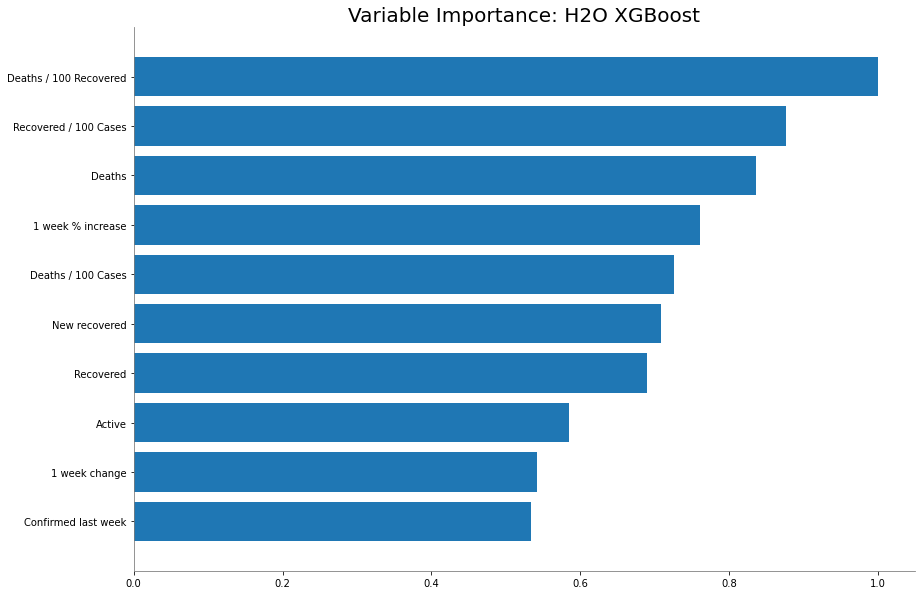

<Figure size 432x288 with 0 Axes>

In [57]:
out.varimp_plot()